# Test de Normalidad:

Las **Pruebas de Normalidad** se utilizan para determinar si un conjunto de datos está bien modelado por una distribución normal y para calcular la probabilidad de que una variable aleatoria subyacente al conjunto de datos se distribuya normalmente. 

Una basta cantidad de modelos financieros, como el **Mean-Variance Portfolio
Theory**, el **Capital Asset Pricing Model (CAPM)**, la **Hipotesis de Mercados Eficientes** (los precios de las acciones fluctuan aleatoriamente y los retornos estan distribuidos normalmente) y el **Option Pricing Theory** (Geometric Brownian Motion) se basan en el supuesto de que los retornos de los activos estan normalmente distribuidos. Por eso, acontinuacion se presentaran enfoques para testear la normalidad de los retornos dada la serie de tiempo pertinente.

En este caso, utilizamos datos del indice **MERVAL** desde octubre 1996 hasta septiembre 2018. De esta manera, se buscara estudiar si los retornos del indice merval se distribuyen de manera normal o no.

### Importo los paquetes y librerias necesarias

In [6]:
import pandas as pd
import numpy as np
import scipy.stats as scs
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\david\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Cambio el directorio a la carpeta "Datasets" donde voy a tener el archivo de los datos historicos

In [7]:
cd C:\Users\david\Documents\Datasets

C:\Users\david\Documents\Datasets


### Corroboro que la **direccion presente de trabajo** sea igual al directorio cambiado, donde estan las series

In [8]:
pwd

'C:\\Users\\david\\Documents\\Datasets'

### Importo el CSV y lo agrego a un dataframe llamado MERVAL

In [9]:
MERVAL = pd.read_csv("MERV.csv")

### Observo la forma de la serie (filas x columnas)

In [10]:
MERVAL.shape

(5536, 7)

### Busco si faltan valores, True=Si False=No

In [11]:
MERVAL.isnull().any()

Date         False
Open          True
High          True
Low           True
Close         True
Adj Close     True
Volume        True
dtype: bool

### Analizo el typo del Dataframe

In [12]:
type(MERVAL)

pandas.core.frame.DataFrame

### Creo un dataframe solo para los cierres ajustados y utilizo el dropna para descartar la fila con los NaN

In [13]:
MERV = MERVAL['Adj Close'].dropna()

### Comparo la cantidad de datos en la nueva serie sin NaN con la original, asi verifico si elimino las filas

In [14]:
len(MERV), len(MERVAL)

(5371, 5536)

### Grafico los cierres del activo (normalizado) para que arranque de 100. Esto me permite graficar otros activos y compararlos ya que todos arrancarian del mismo punto.

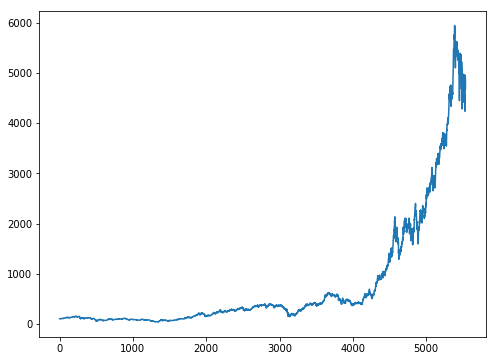

In [21]:
(MERV / MERV.iloc[0] * 100).plot(figsize=(8, 6))

### Calculo los retornos logaritmicos e imprimo los primeros 5 valores del mismo

El shift sirve para dividir el cierre del MERVAL con el cierre del MERVAL en t-1, por eso el **.shift(1)**

In [11]:
log_returns = np.log(MERV / MERV.shift(1))
log_returns.head()

0         NaN
1   -0.011882
2    0.002518
3   -0.000496
4   -0.000496
Name: Adj Close, dtype: float64

### Guardo los valores calculados arriba (retornos logaritmicos) en la variable [log_returns]

El **log_returns[1:]** hace que agarre valores desde la segunda fila hasta el final, ya que como vemos arriba, el **valor[0] = fila 1** es un NaN.

In [12]:
log_returns = log_returns[1:]

### Grafico un histograma de los retornos para observar su distribucion

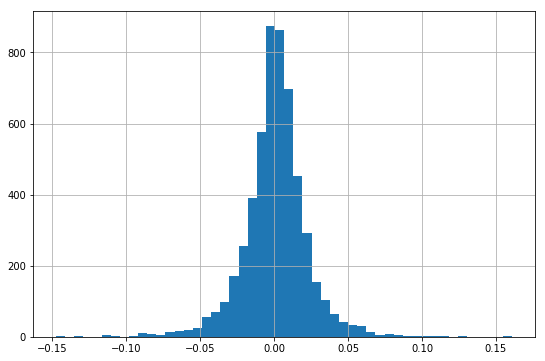

In [13]:
log_returns.hist(bins=50, figsize=(9, 6))

### Grafico el cuantil-cuantil / Q-Q / Quantile Quantile Plot para los retornos

De esta manera vuelvo a analizar la distribucion de los retornos. 
Si la distribucion es **NORMAL**, los puntos deberian estar sobre la recta. Si los valores se posicionan arriba o abajo la recta, significa que tienen **COLAS GORDAS** o **FAT TAILS.**

Text(0,0.5,'sample quantiles')

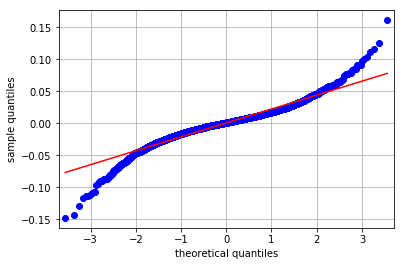

In [14]:
sm.qqplot(log_returns.dropna(), line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

En este caso se puede ver que la distribucion de los retornos **No es Normal** debido a la presencia de **Fat Tails.**

### Defino una funcion para testear la normalidad, asimetria y kurtosis de los retornos, asi como sus p-values.

In [15]:
def normality_tests(arr):
    print("Skew of data set %14.3f" % scs.skew(arr))
    print("Skew test p-value %14.3f" % scs.skewtest(arr)[1])
    print("Kurt of data set %14.3f" % scs.kurtosis(arr))
    print("Kurt test p-value %14.3f" % scs.kurtosistest(arr)[1])
    print("Norm test p-value %14.3f" % scs.normaltest(arr)[1])
    return 

## Testeando normalidad

Ahora vamos a correr la funcion creada, aplicada a los valores de log_returns.
El log returns esta en formato Pandas Series asi que necesitamos transformarlo a numpy ndarray usando el **".values"**, ya que si no la funcion tira error como observaran a acontinuacion.

In [16]:
# OBSERVAMOS QUE EL TIPO DE DATAFRAME ES UN PANDAS SERIES.
type(log_returns)

pandas.core.series.Series

In [17]:
## TIRA ERROR AL SER PANDAS SERIES.
normality_tests(log_returns.flatten())

AttributeError: 'Series' object has no attribute 'flatten'

### Analizamos el tipo del dataframe de los retornos para ver si lo transformamos en un numpy.ndarray y corremos la funcion del test de normalidad

In [18]:
type(log_returns.values)

numpy.ndarray

In [19]:
# OBSERVAMOS QUE CON UN NUMPY.NDARRAY NO TIRA ERROR AL CORRER LA FUNCION DEL TEST DE NORMALIDAD.
normality_tests(log_returns.values.flatten())

Skew of data set         -0.291
Skew test p-value          0.000
Kurt of data set          4.715
Kurt test p-value          0.000
Norm test p-value          0.000


### Los p-values del test indican si los retornos estan normalmente distribuidos

Si los **p-values son iguales a 0.05 o mayores**, no se rechaza la hipotesis nula de que **existe una distribucion normal** para los retornos. Por el otro lado, los retornos del MERVAL no tienen una ditribucion normal (p-values = 0). Se rechaza la hipotesis nula. 